In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('spam.csv',encoding='latin1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
## Steps

## 1. data clean
## 2. EDA
## 3. Text Preprossing
## 4. Model Building
## 5. Model evaluation
## 6. Improvement
## 7. Website
## 8. Deployement


### Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.isnull().mean()*100

v1             0.000000
v2             0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64

In [8]:
## we can remove these 3 columns

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.rename(columns={'v1':'target','v2':'text'},inplace= True)

In [11]:
df.sample(6)

,target,text
3411,ham,No she didnt. I will search online and let you...
144,ham,Yes see ya not on the dot
184,ham,Going on nothing great.bye
835,ham,Good Morning my Dear........... Have a great &...
1189,ham,In that case I guess I'll see you at campus lodge
1354,ham,Baaaaabe! I misss youuuuu ! Where are you ? I ...


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
lb = LabelEncoder()

In [14]:
df['target'] =lb.fit_transform(df['target'])

In [15]:
lb.classes_

array(['ham', 'spam'], dtype=object)

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
## Duplicate values Removed
# df = df[~df.duplicated()]

df = df.drop_duplicates(keep='first')

In [18]:
df.shape

(5169, 2)

In [19]:
df.duplicated().sum()

0

## EDA



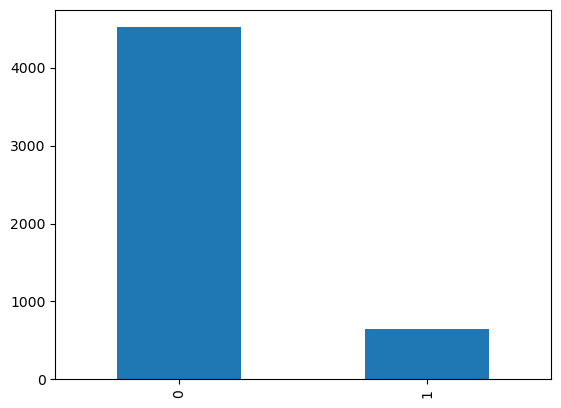

In [20]:
df['target'].value_counts().plot(kind ='bar')
plt.show()

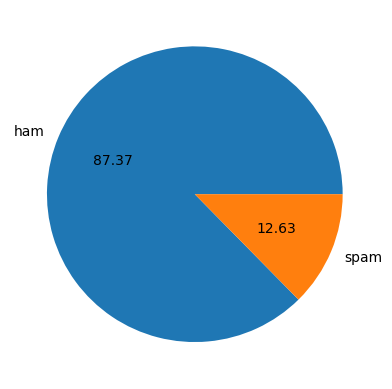

In [21]:
## 
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [22]:
### here we can see this dataset is Imbalanced dataset 

In [23]:
import nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sunil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['number_of_charecters']=df['text'].apply(len)

In [26]:
## Number of words

df['number_of_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [27]:
df.head()

,target,text,number_of_charecters,number_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
## Number of sentance
df['number_of_sentances'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,target,text,number_of_charecters,number_of_words,number_of_sentances
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[['number_of_charecters','number_of_words','number_of_sentances']].describe()

,number_of_charecters,number_of_words,number_of_sentances
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [31]:
## ham sms distribuation

df[df['target']==0][['number_of_charecters','number_of_words','number_of_sentances']].describe()

,number_of_charecters,number_of_words,number_of_sentances
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [32]:
## spam sms distribuation

df[df['target']==1][['number_of_charecters','number_of_words','number_of_sentances']].describe()

,number_of_charecters,number_of_words,number_of_sentances
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [33]:
## Here we can see if the massage is spam then number of words and charecter and sentances is long or high see in below graphs

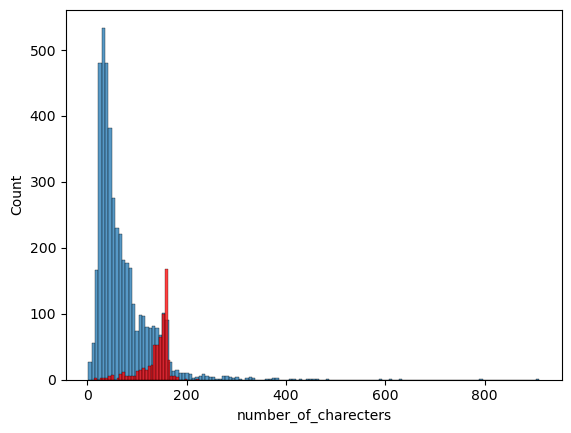

In [34]:
### ham histograme
sns.histplot(df[df['target']==0]['number_of_charecters'])

## Spam
sns.histplot(df[df['target']==1]['number_of_charecters'],color='r')
plt.show()

In [35]:
###

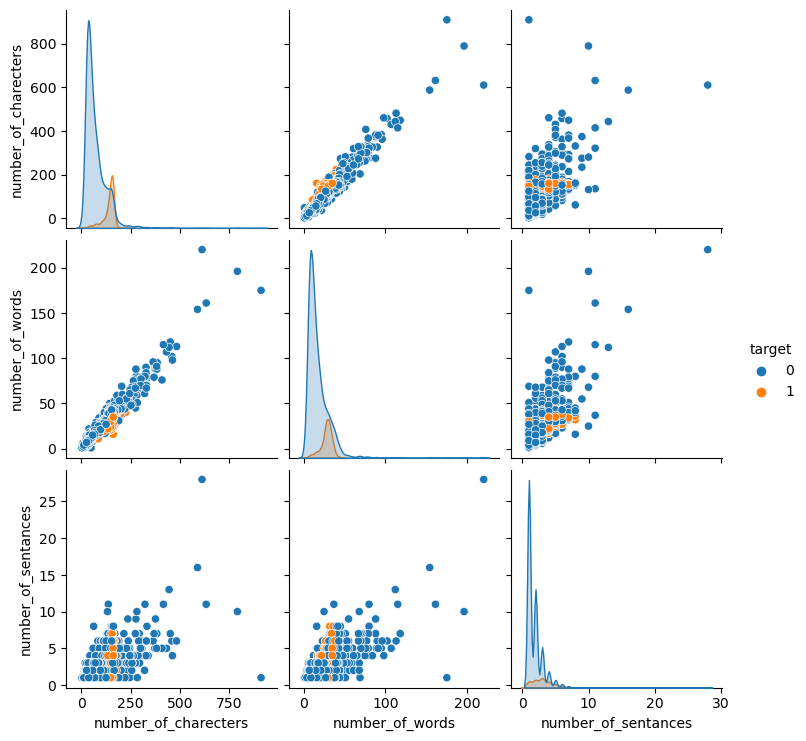

In [36]:
sns.pairplot(df,hue= 'target')
plt.show()

<AxesSubplot:>

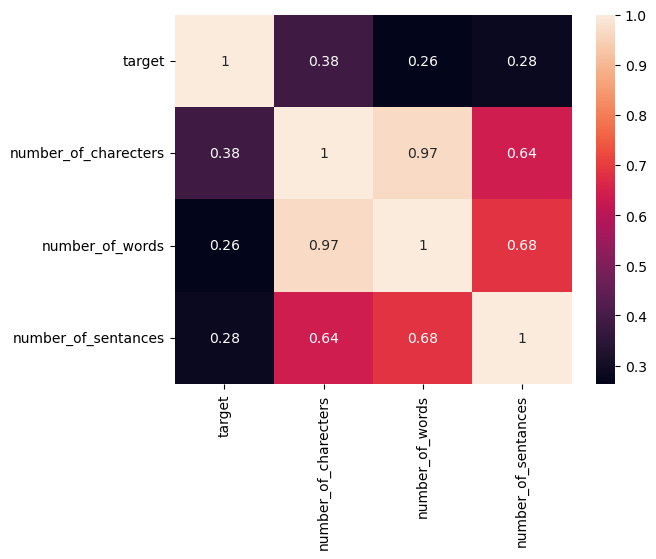

In [37]:
sns.heatmap(df.corr(),annot=True)

In [38]:
### Here we can see relation of number_of_charecter,number_of_words,number_of_sentances with target is similar or Multicollinearity relation we can see that
## so here in model training just use single feature

## Text-Preprocessing

- lower case
- Tokenization
- removing special words
- remove stopwords and punctuations
- stemming

In [39]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

In [40]:
def preprocess(text):
    text = text.lower()
    
    ## Tokenization
    text = nltk.word_tokenize(text)
    
    ## special charecter
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
            
    ## Remove stopwords
    stops = stopwords.words('english')
    for i in text:
        if i not in stops and i not in string.punctuation:
            y.append(i)
            
    ## Stemming
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)


In [41]:
preprocess('i love to watch the movies')

'love watch movi'

In [42]:
## Check 
df['text'][200]

'I sent you  &lt;#&gt;  bucks'

In [43]:
preprocess(df['text'][200])

'sent lt gt buck'

In [44]:
## apply on dataset

df['trasformed_text'] = df['text'].apply(preprocess)

In [45]:
df.head()

,target,text,number_of_charecters,number_of_words,number_of_sentances,trasformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [46]:
## Word cloud : use for important words highlited 
from wordcloud import WordCloud

wc = WordCloud(width=400,height=300,min_font_size=10,background_color='white')

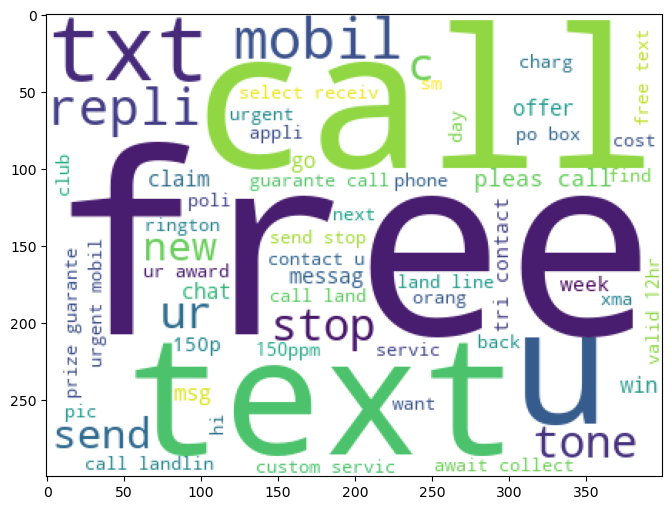

In [47]:
plt.figure(figsize =(12,6))
spam_word_cloud = wc.generate(df[df['target']==1]['trasformed_text'].str.cat(sep = ' '))
plt.imshow(spam_word_cloud)

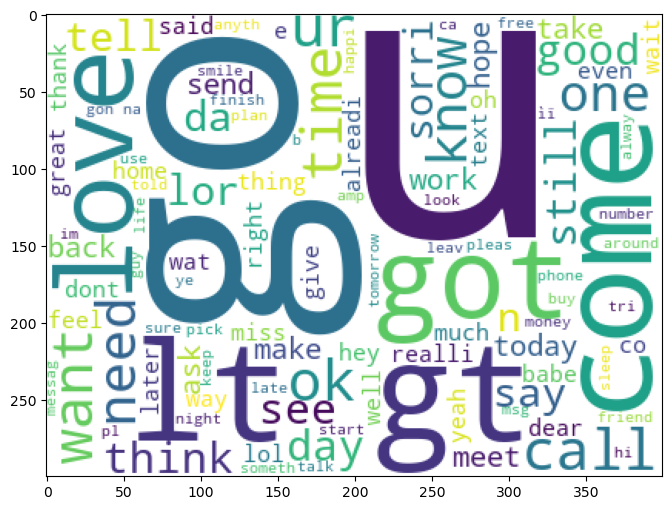

In [48]:
### Ham massages

plt.figure(figsize =(12,6))
ham_word_cloud = wc.generate(df[df['target']==0]['trasformed_text'].str.cat(sep = ' '))
plt.imshow(ham_word_cloud)

In [49]:
df.head()

,target,text,number_of_charecters,number_of_words,number_of_sentances,trasformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [50]:
### Top 50 words that used in spam and ham

spam_word = []
for massage in df[df['target']==1]['trasformed_text'].tolist():
       for word in massage.split():
            spam_word.append(word)

In [51]:
len(spam_word)

9939

In [52]:
from collections import Counter
c = Counter(spam_word)
pd.DataFrame(c.most_common(30))

## These are most 50 words that are used in spam massages

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


C:\Users\sunil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


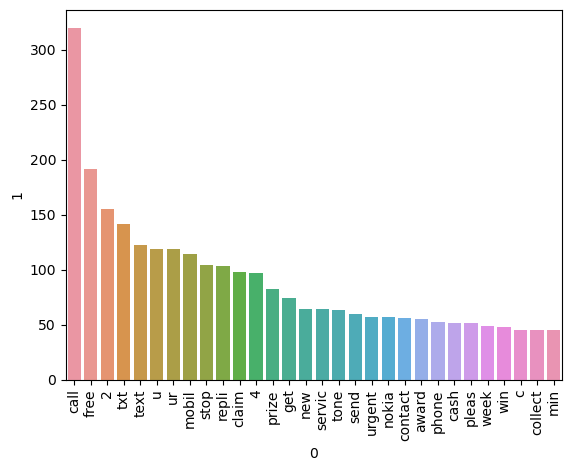

In [53]:
sns.barplot(pd.DataFrame(c.most_common(30))[0],pd.DataFrame(c.most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [54]:
### For Ham 
ham_word = []
for massage in df[df['target']==0]['trasformed_text'].tolist():
       for word in massage.split():
            ham_word.append(word)
            
from collections import Counter
c = Counter(ham_word)
pd.DataFrame(c.most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


In [55]:
len(ham_word)

35394

C:\Users\sunil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


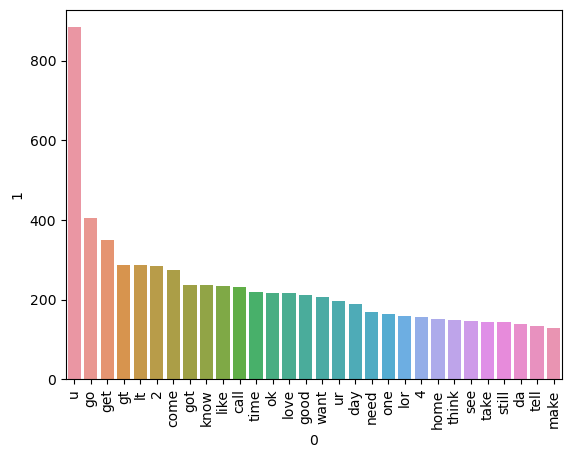

In [56]:
sns.barplot(pd.DataFrame(c.most_common(30))[0],pd.DataFrame(c.most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

## Model Building

In [57]:
df.head()

,target,text,number_of_charecters,number_of_words,number_of_sentances,trasformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [58]:
## For building machine learning model we have to convert text data in number format

#### Method
1. Bag of words
2. Text Vectorization

In [59]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()



In [60]:
X  = cv.fit_transform(df['trasformed_text']).toarray()


In [61]:
y = df['target'].values

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=2,test_size=0.2)

In [64]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [65]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [66]:
gnb.fit(x_train,y_train)

GaussianNB()

In [67]:
y_pred1 = gnb.predict(x_test)

In [68]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [69]:
print(f'accuracy score {accuracy_score(y_test,y_pred1)}')
print(f'confusion matrix \n{confusion_matrix(y_test,y_pred1)}')
print(f'precision_score {precision_score(y_test,y_pred1)}')

accuracy score 0.8800773694390716
confusion matrix 
[[792 104]
 [ 20 118]]
precision_score 0.5315315315315315


In [70]:
## MultinomialNB

mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)

In [71]:
print(f'accuracy score {accuracy_score(y_test,y_pred2)}')
print(f'confusion matrix \n{confusion_matrix(y_test,y_pred2)}')
print(f'precision_score {precision_score(y_test,y_pred2)}')

accuracy score 0.9642166344294004
confusion matrix 
[[871  25]
 [ 12 126]]
precision_score 0.8344370860927153


In [72]:
## BernoulliNB

bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)

In [73]:
print(f'accuracy score {accuracy_score(y_test,y_pred3)}')
print(f'confusion matrix \n{confusion_matrix(y_test,y_pred3)}')
print(f'precision_score {precision_score(y_test,y_pred3)}')

accuracy score 0.9700193423597679
confusion matrix 
[[893   3]
 [ 28 110]]
precision_score 0.9734513274336283


In [74]:
### Here we can see BernoulliNB distribuation precision score is high this model is perfect

#### Check with Tfidf

In [75]:
tfidf = TfidfVectorizer()

In [76]:
X_tfidf  =tfidf.fit_transform(df['trasformed_text']).toarray()

In [77]:
X_train,X_test,Y_train,Y_test = train_test_split(X_tfidf,y,random_state=2,test_size=0.2)

In [78]:
gnb.fit(X_train,Y_train)

y_pred_tfidf1 = gnb.predict(X_test)

In [79]:
print(f'accuracy score {accuracy_score(Y_test,y_pred_tfidf1)}')
print(f'confusion matrix \n{confusion_matrix(Y_test,y_pred_tfidf1)}')
print(f'precision_score {precision_score(Y_test,y_pred_tfidf1)}')

accuracy score 0.8762088974854932
confusion matrix 
[[793 103]
 [ 25 113]]
precision_score 0.5231481481481481


In [80]:
### ## MultinomialNB

mnb.fit(X_train,Y_train)
y_pred_tfidf2 = mnb.predict(X_test)

In [81]:
print(f'accuracy score {accuracy_score(Y_test,y_pred_tfidf2)}')
print(f'confusion matrix \n{confusion_matrix(Y_test,y_pred_tfidf2)}')
print(f'precision_score {precision_score(Y_test,y_pred_tfidf2)}')

accuracy score 0.9593810444874274
confusion matrix 
[[896   0]
 [ 42  96]]
precision_score 1.0


In [82]:
## BernoulliNB

bnb.fit(X_train,Y_train)
y_pred_tfidf3 = bnb.predict(X_test)

In [83]:
print(f'accuracy score {accuracy_score(Y_test,y_pred_tfidf3)}')
print(f'confusion matrix \n{confusion_matrix(Y_test,y_pred_tfidf3)}')
print(f'precision_score {precision_score(Y_test,y_pred_tfidf3)}')

accuracy score 0.9700193423597679
confusion matrix 
[[893   3]
 [ 28 110]]
precision_score 0.9734513274336283


In [84]:
### Here is  MultinomialNB is performing good beacouse precision score is good here acuracy not matter 
### beacouse data is imbalanced so here we check which model give presicion score is high

In [85]:
### Tfid and MNB used here

## Other model Comparision

In [86]:
# pip install xgboost

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [88]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [89]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [90]:
from sklearn.metrics import accuracy_score, precision_score

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


C:\Users\sunil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [91]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [92]:
 performance_df = pd.DataFrame({'algorithm':clfs.keys(),'Accuracy': accuracy_scores,'Precision': precision_scores}).sort_values('Precision',ascending=False)

In [93]:
performance_df

,algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.973888,1.000000
8,ETC,0.975822,0.982906
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
4,LR,0.951644,0.940000
10,xgb,0.969052,0.934426
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


In [94]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [95]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [96]:
temp_df = pd.DataFrame({'algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [97]:
new_df = performance_df.merge(temp_df,on='algorithm')
new_df

,algorithm,Accuracy,Precision,Accuracy_scaling,Precision_scaling
0,KN,0.900387,1.000000,0.900387,1.000000
1,NB,0.959381,1.000000,0.959381,1.000000
2,RF,0.973888,1.000000,0.973888,1.000000
3,ETC,0.975822,0.982906,0.975822,0.982906
4,SVC,0.972921,0.974138,0.972921,0.974138
5,AdaBoost,0.961315,0.945455,0.961315,0.945455
6,LR,0.951644,0.940000,0.951644,0.940000
7,xgb,0.969052,0.934426,0.969052,0.934426
8,GBDT,0.952611,0.923810,0.952611,0.923810
9,BgC,0.958414,0.862595,0.958414,0.862595


In [98]:
new_df_scaled = new_df.merge(temp_df,on='algorithm')

In [99]:
temp_df = pd.DataFrame({'algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [100]:
new_df_scaled.merge(temp_df,on='algorithm')

,algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.900387,1.000000,0.900387,1.000000,0.900387,1.000000,0.900387,1.000000
1,NB,0.959381,1.000000,0.959381,1.000000,0.959381,1.000000,0.959381,1.000000
2,RF,0.973888,1.000000,0.973888,1.000000,0.973888,1.000000,0.973888,1.000000
3,ETC,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
4,SVC,0.972921,0.974138,0.972921,0.974138,0.972921,0.974138,0.972921,0.974138
5,AdaBoost,0.961315,0.945455,0.961315,0.945455,0.961315,0.945455,0.961315,0.945455
6,LR,0.951644,0.940000,0.951644,0.940000,0.951644,0.940000,0.951644,0.940000
7,xgb,0.969052,0.934426,0.969052,0.934426,0.969052,0.934426,0.969052,0.934426
8,GBDT,0.952611,0.923810,0.952611,0.923810,0.952611,0.923810,0.952611,0.923810
9,BgC,0.958414,0.862595,0.958414,0.862595,0.958414,0.862595,0.958414,0.862595


In [101]:
# Voting Classifier

# svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
# mnb = MultinomialNB()
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

# from sklearn.ensemble import VotingClassifier

In [102]:
# voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [103]:
# voting.fit(X_train,y_train)

In [104]:
# y_pred = voting.predict(X_test)
# print("Accuracy",accuracy_score(y_test,y_pred))
# print("Precision",precision_score(y_test,y_pred))

In [105]:
#####

In [106]:
import pickle

In [107]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))